<a href="https://colab.research.google.com/github/neel26desai/cmpe255_clustering/blob/main/ImageClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images

In [ ]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

In [1]:
%cd /content/ImageBind/

/content/ImageBind


In [4]:
import imagebind.data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

In [5]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
# Instantiate model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

100%|██████████| 4.47G/4.47G [00:29<00:00, 164MB/s]


ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [6]:
import os

In [28]:
image_paths = ['/content/drive/MyDrive/flower_images/flower_images/'+i for i in os.listdir('/content/drive/MyDrive/flower_images/flower_images/') if i[-3:]=='png']

In [30]:
# specifying the input and loading the data
inputs = {
 ModalityType.VISION: imagebind.data.load_and_transform_vision_data(image_paths, device)
}

In [31]:
#generating the embeddings
with torch.no_grad():
 embeddings = model(inputs)

In [33]:
embeddings

{'vision': tensor([[ 0.0373, -0.0012,  0.0080,  ..., -0.0149, -0.0491, -0.0118],
         [-0.0005,  0.0076,  0.0099,  ...,  0.0054,  0.0112,  0.0166],
         [-0.0190, -0.0009, -0.0095,  ...,  0.0119,  0.0289, -0.0360],
         ...,
         [-0.0223,  0.0194,  0.0158,  ..., -0.0159,  0.0070,  0.0095],
         [-0.0008,  0.0089,  0.0056,  ..., -0.0082,  0.0258,  0.0112],
         [ 0.0152,  0.0136,  0.0074,  ...,  0.0113, -0.0215,  0.0021]],
        device='cuda:0')}

In [34]:
embeddings['vision'].shape

torch.Size([210, 1024])

In [36]:
from sklearn.cluster import KMeans

In [52]:
embeddings_cpu=embeddings['vision'].to('cpu').numpy()

In [37]:
# Define the number of clusters
n_clusters = 10  # the images belong to 10 different species

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [41]:
clusters = kmeans.fit_predict(embeddings_cpu)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


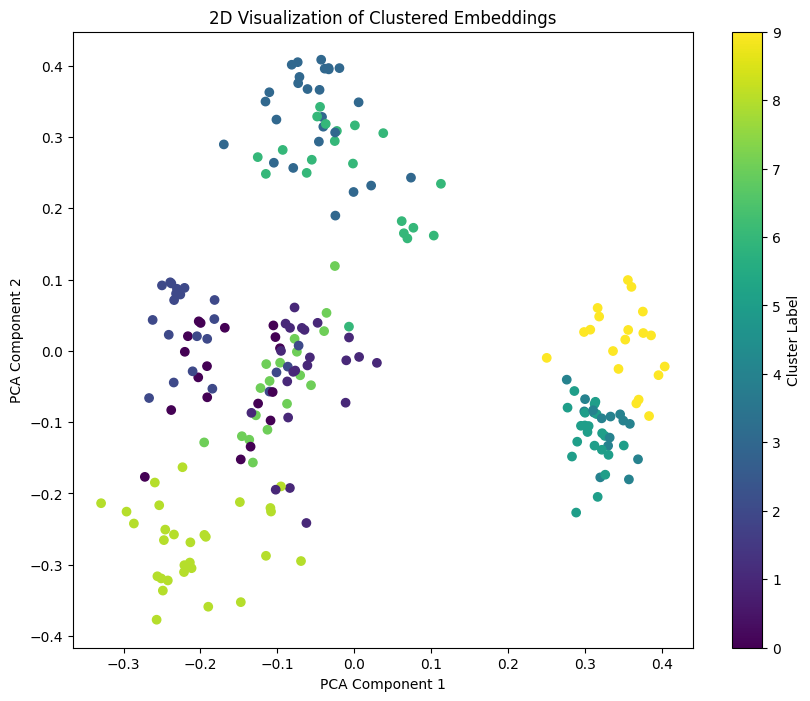

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce the dimensionality of the embeddings to 2D for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_cpu)

# Plot the embeddings with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('2D Visualization of Clustered Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [58]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate cluster quality metrics
silhouette_avg = silhouette_score(embeddings_cpu, clusters)
davies_bouldin = davies_bouldin_score(embeddings_cpu, clusters)
calinski_harabasz = calinski_harabasz_score(embeddings_cpu, clusters)

silhouette_avg, davies_bouldin, calinski_harabasz


(0.27644548, 1.4120479829643011, 28.828649402513335)